<a href="https://colab.research.google.com/github/vidulkumar/Neural-Network/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adadelta
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1133 - acc: 0.9697 - val_loss: 0.0473 - val_acc: 0.9855
Epoch 2/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0792 - acc: 0.9780 - val_loss: 0.0451 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0688 - acc: 0.9808 - val_loss: 0.0404 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0580 - acc: 0.9833 - val_loss: 0.0435 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0525 - acc: 0.9851 - val_loss: 0.0463 - val_acc: 0.9885
Epoch 6/12
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0444 - acc: 0.9875 - val_loss: 0.0406 - val_acc: 0.9897
Epoch 7/12
60000/60000 [===

prediction is  [6]
Label 6


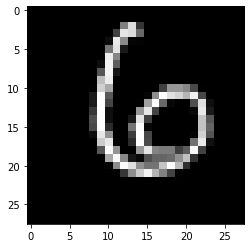

In [0]:
(p_train, q_train), (p_test, q_test) = mnist.load_data()
import numpy as np
from matplotlib import pyplot as plt
i = 100
print("prediction is ",model.predict_classes(p_test[i].reshape(1,28,28,1)))
print('Label',q_test[i])
first_image = p_test[i]
first_image = np.array(first_image, dtype='uint8')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

740
prediction is  [9]
Label 4


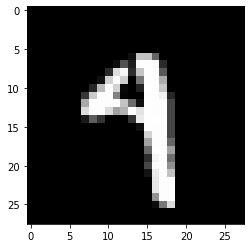

In [0]:
#this code is to show errors in prediction by model
for i in range(620,10000):
  if model.predict_classes(p_test[i].reshape(1,28,28,1))[0]!=q_test[i]:
    print(i)
    print("prediction is ",model.predict_classes(p_test[i].reshape(1,28,28,1)))
    print('Label',q_test[i])
    first_image = p_test[i]
    first_image = np.array(first_image, dtype='uint8')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    break